# Lab 8: Define and Solve an ML Problem of Your Choosing

In [25]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [26]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

print(df.columns)

df.head()


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I have chosen the census data set that contains Census information from 1994: censusData.csv. This dataset contains demographic and employment-related information for individuals in the US. 

I will be predicting whether an individual earns more than 50K USD annually based on demographic and work-related features. The label is the column (income_binary) which I will convert into binary numberical values: 1 for ">50K" and 0 for "<=50K".

My ML problem is a supervised learning problem. I am training the model on a labelled dataset which already includes the output label (income level). My goal is to train a model that learns the relationship between the input features (age, education, occupation, etc) and the known output "income". Moreover, this is a classification problem because we are not trying to predict a continuous value, but we are trying to predict whether the income falls into one of the two categories: earning more than 50K or earning less than 50K. Since there is only two categories, this is a binary classification problem. 

My features are: age, workclass, education-num, occupation, hours-per-week. (I plan to explore and remove or add features as I analyse the dataset)

This problem has important real-world implications. Since, this model predicts income level based on demographic and work-related features, it is of value to many businesses like fintech companies as it can aid them with credit scoring. This model can also be useful for recruiters to help them understand what factors are influencing the wages. Additionally, governments and non-profits can benefit from this to design better-targeted social-welfare and workforce development programs; or policy researchers for they can identify economic disparities across race, gender, education level and recommend policies to mitigate said disparitieis. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [27]:
#DATA PREPARATION:

#Understanding the statistical summary
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


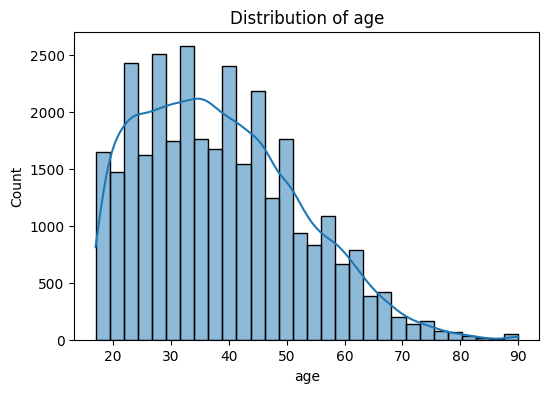

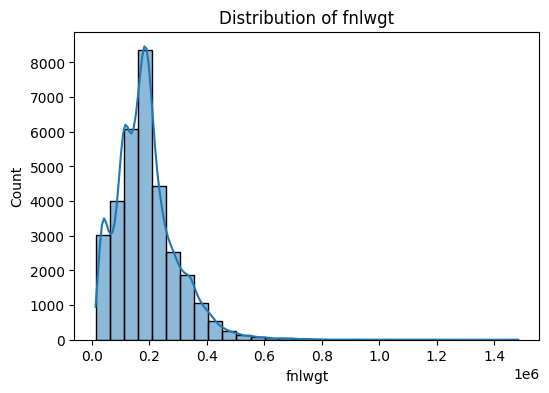

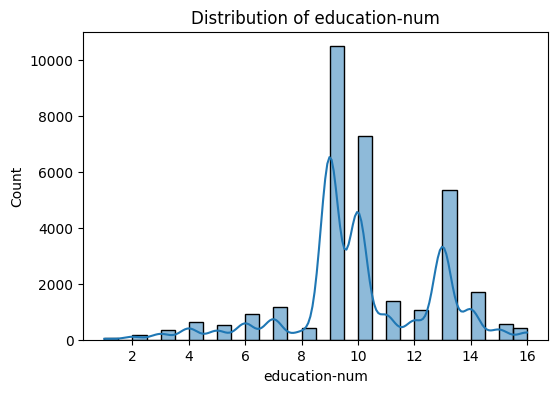

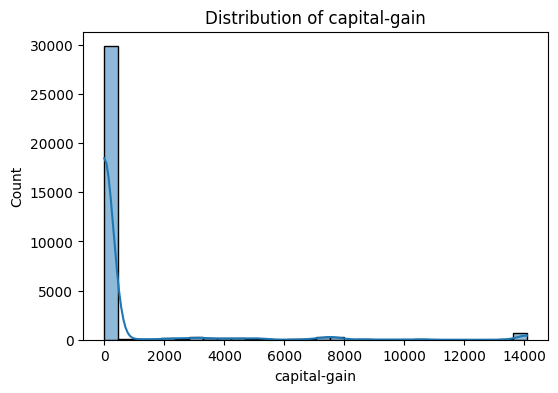

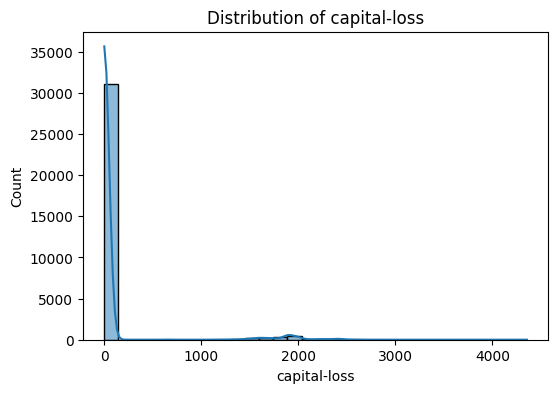

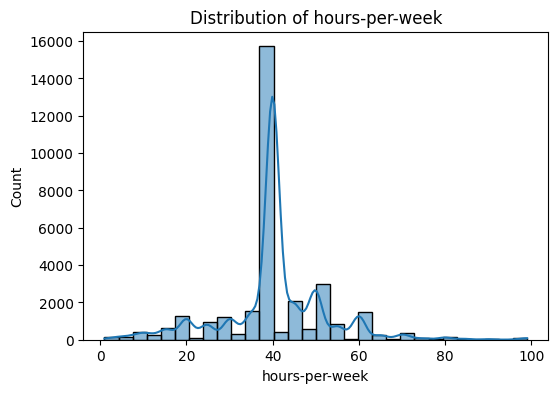

In [28]:
#Visualize numerical feature distributions to check for skewness or outliers
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

The above visualization shows that the age and fnlwgt is skewed to the left while education-num and hous-per-week has a normal distribution. There are not many capital gain and capital loss values and they are highly skewed, so they are candidates for dropping. 

In [29]:
#converting income_binary to numerical value (0 and 1):
df['income_binary_num'] = df['income_binary'].apply(lambda x: 1 if x == '>50K' else 0)

#checking the correlation to find the features with highest correlation with the label
df.corr()['income_binary_num']

age                  0.233638
fnlwgt              -0.009463
education-num        0.335154
capital-gain         0.347555
capital-loss         0.150526
hours-per-week       0.229523
income_binary_num    1.000000
Name: income_binary_num, dtype: float64

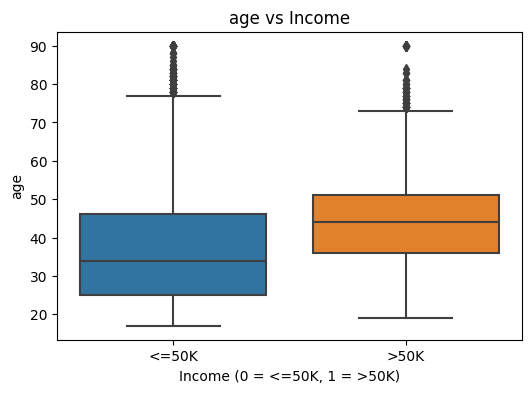

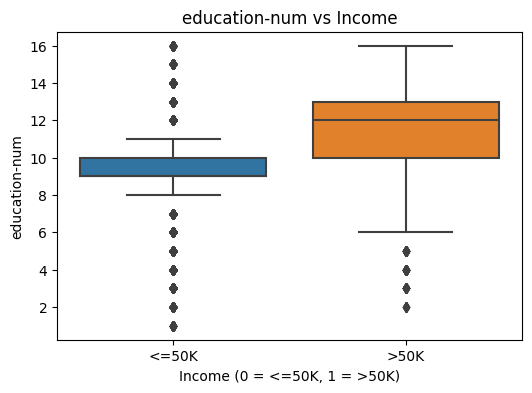

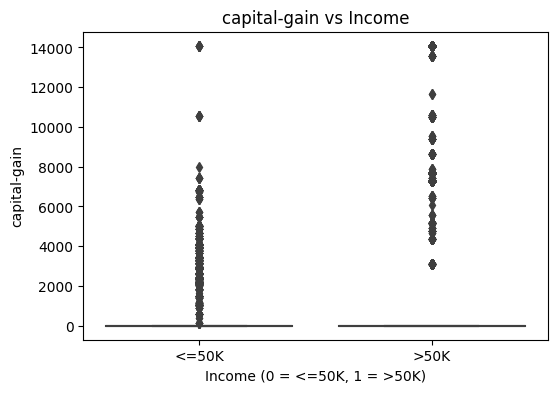

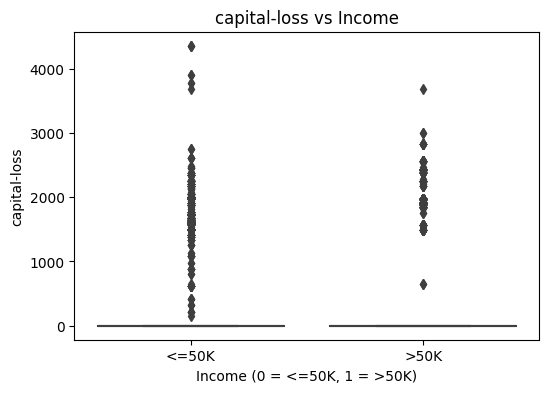

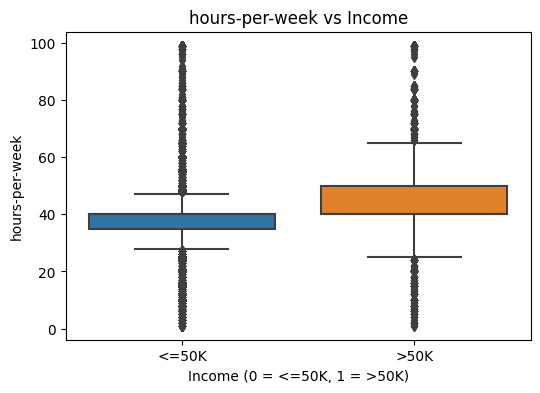

In [30]:
#visualizing relationship between features and label: 
features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='income_binary', y=col, data=df)
    plt.title(f'{col} vs Income')
    plt.xlabel('Income (0 = <=50K, 1 = >50K)')
    plt.ylabel(col)
    plt.show()

Using a boxplot was useful in seeing the outliers visually. This helped me look into what features I needed to perform winsorization on (namely education_num, capital_gain, capital_loss and hours-per-week).

Class Counts:
 <=50K    24720
>50K      7841
Name: income_binary, dtype: int64

Class Percentages:
 <=50K    75.919044
>50K     24.080956
Name: income_binary, dtype: float64


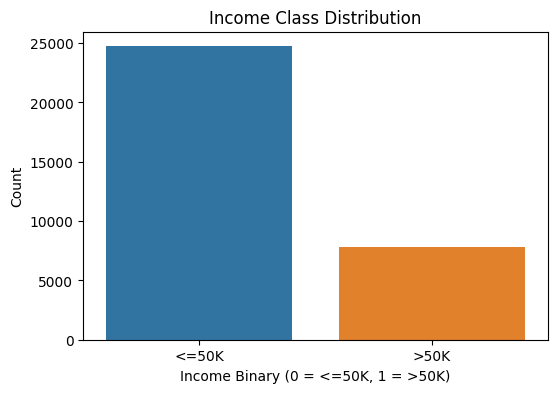

In [31]:
#checking for class imbalance:
class_counts = df['income_binary'].value_counts()
class_percent = df['income_binary'].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percent)

plt.figure(figsize=(6,4))
sns.countplot(x='income_binary', data=df)
plt.title('Income Class Distribution')
plt.xlabel('Income Binary (0 = <=50K, 1 = >50K)')
plt.ylabel('Count')
plt.show()

My dataset has around ~76% of people earning less than 50K and around 24% of people earning more than 50K. Therefore, The model becomes biased toward the majority class because it sees more examples of it during training. The minority class might not have enough representation to learn decision boundaries effectively. Because of this, using just accuracy as a metric might be a shortcoming and we might need to use precision and recall as well.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspecting and preparing my data, I have made a few changes to my dataframe. 

I have a new feature list. I chose to remove ['fnlwgt', 'occupation', 'marital-status', 'relationship', 'race', 'sex_selfID', 'native-country'].
I decided to remove these features because of the following reasons: 
1. fnlwgt had little to no predictive value. When I checked the correlations of different features with the label, this feature had a correlation of -0.0094.
2. occupation: there were just too many values for me to one-hot encode this feature. Moreover, this feature has a high proportion of missing values, which would require extensive imputation or data exclusion.
3. marital status, relationship, race and sex : These variables can capture societal biases and stereotypes.
4. native-country:This variable can also introduce bias linked to nationality or ethnicity and has some missing data.

To perform Exploratory Data Analysis, I did the following:
1. I used df.describe() to see the statistical summary to recognize features with potential outliers (statistical summary).
2. I checked for correlation using df.corr() and dropped features based on low correlation (feature selection).
3. I checked for class imbalance and saw that my label was skewed to below 50K (class imbalance checking).
4. I visualized different features in order to understand visually their distribution and understand which features was more prone to skewness and outliers so that I can deal with them in the later section. 
   
The different data preparation techniques that I will use to prepare my data for modeling are: 
1. Identify missing values of age and hours per week and imputed the missing values with the mean (imputation).
2. Check for outliers and winsorized education years, capital gain, capital loss and hours per week (winsorization).
3. Drop the original columns after creating winsorized versions.
4. Convert income binary to numerical value 0 and 1.
5. Group values for workclass and education and one hot encoded them (one-hot encoding and grouping).


The model I selected for this problem is Logistic Regression. I will compare the performance of logistic regression with other models like the DecisionTreeClassifier and RandomForestClassifier to check which one perfoms the best by comparing them on the metrics of accuracy, precision and recall. 

My plan to train the model: 
1. I will first create a logistic regression model with default hyperparameters.
2. I will split my dataset into X_test, y_test, X_train, y_train
3. I will evaluate the  baseline Logistic Regression model with log loss, accuracy, precision, recall, and cross-validation.
4. I will compare Logistic Regression with Decision Tree and Random Forest using accuracy, precision, and recall metrics.
5. I will selecte the best performing model based on accuracy, precision, recall, interpretability, and speed.
6. I will improved the chosen model using GridSearchCV to tune the hyperparameters.
7. I will retrain the best model with the best parameter and evaluated it again, confirming consistent performance.

I am planning to use precision and recall in addition to accuracy, because my dataset is imbalanced with around ~76% of one type of the two labels. Because of this, only using accuracy can be misleading. Recall measures how well a model identifies all the true positives (in this case, how many of the actual high earners (>50K) my model correctly detects). Precision tells us how many of the predicted high earners are actually correct. So, by considering precision and recall together, I will get a clearer picture of how well my model performs on the minority class (>50K earners),


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [32]:
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [33]:
# inspecting the df and label: 
print("The shape of the data matrix is:", df.shape)
print(df['income_binary'])

#identifying missing values: 
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

The shape of the data matrix is: (32561, 16)
0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income_binary, Length: 32561, dtype: object
age                   162
workclass            1836
fnlwgt                  0
education               0
education-num           0
marital-status          0
occupation           1843
relationship            0
race                    0
sex_selfID              0
capital-gain            0
capital-loss            0
hours-per-week        325
native-country        583
income_binary           0
income_binary_num       0
dtype: int64


In [34]:
#fixing the missingness of "age", "hour-per-week"
mean_ages = df['age'].mean()
df['age'].fillna(value = mean_ages, inplace=True)

mean_hours = df['hours-per-week'].mean()
df['hours-per-week'].fillna(value = mean_hours, inplace=True)

print(np.sum(df.isnull(), axis = 0))

age                     0
workclass            1836
fnlwgt                  0
education               0
education-num           0
marital-status          0
occupation           1843
relationship            0
race                    0
sex_selfID              0
capital-gain            0
capital-loss            0
hours-per-week          0
native-country        583
income_binary           0
income_binary_num       0
dtype: int64


In [35]:

#checking for outliers and winsorizing the values: 

# Winsorize education-num (both tails)
df['education_years'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])

# Winsorize capital-gain (top 1%)
df['capital_gain_wins'] = stats.mstats.winsorize(df['capital-gain'], limits=[0, 0.01])

# Winsorize capital-loss (top 1%)
df['capital_loss_wins'] = stats.mstats.winsorize(df['capital-loss'], limits=[0, 0.01])

# Winsorize hours-per-week (top 1%)
df['hours_per_week_wins'] = stats.mstats.winsorize(df['hours-per-week'], limits=[0, 0.01])

In [36]:
# Drop original columns after creating winsorized versions
columns = ['education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df = df.drop(columns=columns)
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex_selfID', 'native-country',
       'income_binary', 'income_binary_num', 'education_years',
       'capital_gain_wins', 'capital_loss_wins', 'hours_per_week_wins'],
      dtype='object')


In [37]:
#dropping irrelavant features: 
irrelevant_features = ['fnlwgt', 'occupation', 'marital-status', 'relationship', 'race', 'sex_selfID', 'native-country', 'capital_loss_wins']
df = df.drop(columns = irrelevant_features)
df.columns

Index(['age', 'workclass', 'education', 'income_binary', 'income_binary_num',
       'education_years', 'capital_gain_wins', 'hours_per_week_wins'],
      dtype='object')

In [38]:
#ONE HOT ENCODING: 

# grouping values of workclass and education to reduce dimensionality
columns_not_Private = ~(df['workclass'] == 'Private')
gov = ['Federal-gov','Local-gov', 'State-gov']
columns_other = ~df['workclass'].isin(gov)  

# leave nan (null) in the dataset for now
columns_not_null = ~(df['workclass'].isnull())  

# create condition: not Private, not null, and is in the gov list
condition = columns_not_Private & columns_not_null & ~columns_other  # i.e., gov jobs only

# Label government jobs
df['workclass'] = np.where(condition, 'Government', df['workclass'])

# group all remaining workclasses into 'Other' (excluding Private and Government)
condition_other = ~df['workclass'].isin(['Private', 'Government']) & ~(df['workclass'].isnull())
df['workclass'] = np.where(condition_other, 'Other', df['workclass'])

# View unique values and first few rows
print(df['workclass'].unique())

#for education: 
postgrad = ['Masters', 'Doctorate', 'Prof-school']  #anything more than a bachelors
bachelors = ['Bachelors']

# Apply transformations
df['education'] = np.where(df['education'].isin(postgrad), 'PostGrad', df['education'])
df['education'] = np.where(df['education'].isin(bachelors), 'Bachelors', df['education'])

# Everything else is BelowBachelors
condition_below = ~df['education'].isin(['PostGrad', 'Bachelors'])
df['education'] = np.where(condition_below, 'BelowBachelors', df['education']) 

# Check result
print(df['education'].unique())

# One-hot encoding education and workclass
df = pd.get_dummies(df, columns=['workclass', 'education'])

df.head(10)

['Government' 'Other' 'Private' nan]
['Bachelors' 'BelowBachelors' 'PostGrad']


,age,income_binary,income_binary_num,education_years,capital_gain_wins,hours_per_week_wins,workclass_Government,workclass_Other,workclass_Private,education_Bachelors,education_BelowBachelors,education_PostGrad
0,39.0,<=50K,0,13,2174,40.0,1,0,0,1,0,0
1,50.0,<=50K,0,13,0,13.0,0,1,0,1,0,0
2,38.0,<=50K,0,9,0,40.0,0,0,1,0,1,0
3,53.0,<=50K,0,7,0,40.0,0,0,1,0,1,0
4,28.0,<=50K,0,13,0,40.0,0,0,1,1,0,0
5,37.0,<=50K,0,14,0,40.0,0,0,1,0,0,1
6,49.0,<=50K,0,5,0,16.0,0,0,1,0,1,0
7,52.0,>50K,1,9,0,45.0,0,1,0,0,1,0
8,31.0,>50K,1,14,14084,50.0,0,0,1,0,0,1
9,42.0,>50K,1,13,5178,40.0,0,0,1,1,0,0


In [39]:
#MODELLING: 

#Idenitfying features and label
y = df['income_binary_num']
exclude = ['income_binary', 'income_binary_num']
X = df.drop(columns = exclude)

#Create Training and Test Data Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#Train a Logistic Regression Classifier:

#Build a model and fit it
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

#Predict and evaluate 

#logloss
probability_predictions = model.predict_proba(X_test)
l_loss = log_loss(y_test, probability_predictions)

#accuracy
class_label_predictions = model.predict(X_test)
acc_score = accuracy_score(y_test, class_label_predictions)
lr_precision = precision_score(y_test, class_label_predictions)
lr_recall = recall_score(y_test, class_label_predictions)

print("Baseline log loss:\n", l_loss)
print("Baseline accuracy score:\n", acc_score)
print("Baseline precision score:\n", lr_precision)
print("Baseline recall score:\n", lr_recall)

#cross validation to check if model is over/underfitting:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Baseline log loss:
 0.40724802887353145
Baseline accuracy score:
 0.8160601873176724
Baseline precision score:
 0.6954976303317536
Baseline recall score:
 0.3841623036649215


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-validation scores: [0.80038388 0.81996161 0.80671785 0.81608754 0.80687272]
Mean CV accuracy: 0.8100047201635734


The mean cross validation score for the model was 0.8100. The initial model's accuracy score was 0.8161 and log loss was 0.407. This means that the model is performing consistently across different subsets of the data. This suggests the model's good generalization ability without significant overfitting. 


Model Comparison (Other Classifiers):

                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.816060   0.695498  0.384162
1        Decision Tree  0.792722   0.577257  0.435209
2        Random Forest  0.801781   0.603675  0.451571


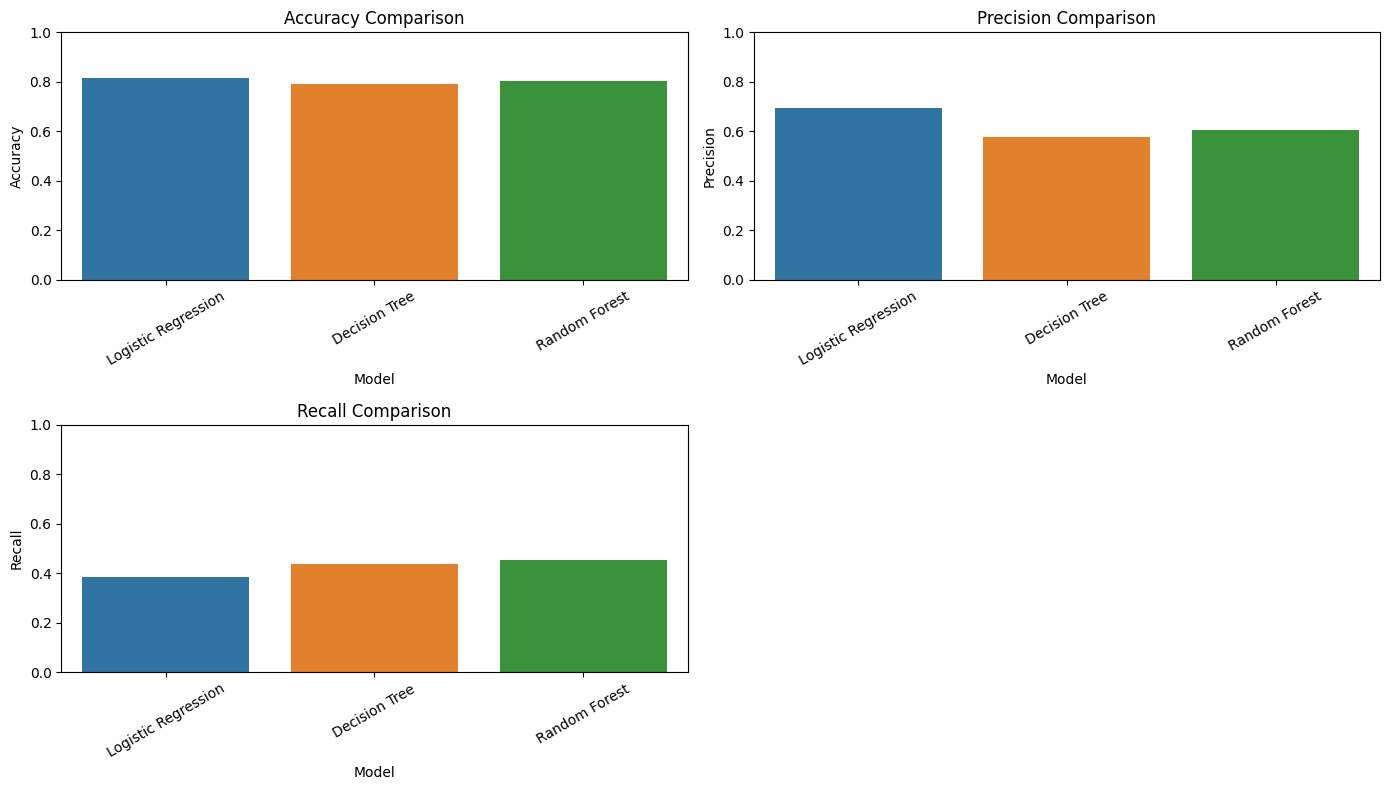

In [40]:

#comparing different models: 
other_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=1234),
    "Random Forest": RandomForestClassifier(random_state=1234)
}

# Dictionary to store results
model_results = {
    "Model": ["Logistic Regression"],
    "Accuracy": [acc_score],
    "Precision": [lr_precision],
    "Recall": [lr_recall]
}

for name, model in other_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    model_results["Model"].append(name)
    model_results["Accuracy"].append(acc)
    model_results["Precision"].append(prec)
    model_results["Recall"].append(rec)

# Create results DataFrame
model_results_df = pd.DataFrame(model_results)
print("\nModel Comparison (Other Classifiers):\n")
print(model_results_df)

# Visualization
plt.figure(figsize=(14, 8))

metrics = ["Accuracy", "Precision", "Recall"]

for idx, metric in enumerate(metrics):
    plt.subplot(2, 2, idx + 1)
    sns.barplot(x="Model", y=metric, data=model_results_df)
    plt.title(f'{metric} Comparison')
    plt.ylim(0, 1)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


Based on the above comparison, logistic regression has the highest accuracy and precision compared to the three models, even though its recall is the lowest. Random forest has the highest recall. High precision means that out of all the times my model predicted >50K, it was correct more than the other models.  However, I am going to select logistic regression as my model because it is faster to train and less prone to overfitting, especially on smaller or moderately-sized datasets and it is highly interpretable. Moreover, it has highest accuracy and precision, which I consider to be a good tradeoff against a slightly low recall. 

In [41]:
#Improving the model: 

#Using Grid_search to find the best hyperparameter configuration: 

param_grid = { 'C' :[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

grid_search = GridSearchCV(LogisticRegression(max_iter = 5000), param_grid, cv = 5, scoring = 'accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameter:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Hyperparameter: {'C': 1}
Best Cross-Validation Accuracy: 0.8100047201635734


According to the grid search for the best parameter for logistic regression: 

Best Hyperparameter: {'C': 1}

Best Cross-Validation Accuracy: 0.8100047201635734

In [42]:
#Implementing improved model:

best_model = LogisticRegression( C= 1, max_iter=5000)
best_model.fit(X_train, y_train)

#Predict and evaluate 

#logloss
probability_predictions = best_model.predict_proba(X_test)
l_loss_imp = log_loss(y_test, probability_predictions)

#accuracy
class_label_predictions = best_model.predict(X_test)
acc_score_imp = accuracy_score(y_test, class_label_predictions)

print("Baseline log loss:\n", l_loss_imp)
print("Baseline accuracy score:\n", acc_score_imp)


Baseline log loss:
 0.40724802887353145
Baseline accuracy score:
 0.8160601873176724


Credit: I used Chatgpt to help me with the visualization codes when comparing the models because I was not confused about how to represent all three at the same time. 